# 개별 코드 

In [1]:
# 데이터 생성
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=200, 
                 n_features=2, 
                 centers=2, 
                 random_state=2)

In [2]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(200, 2)
(200,)


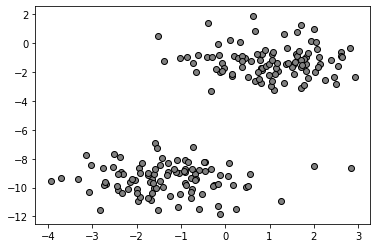

In [3]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [4]:
# 가우시안 혼합 모형
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, 
                      random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)
print(label_gmm)

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


In [5]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd

gmm_columns = ['gmm_comp1', 'gmm_comp2']
X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm
X_gmm_df.head(5)

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0


In [6]:
# 타겟 클래스 종류 확인
print(set(X_gmm_df['target']))
print(set(X_gmm_df['label_gmm']))

{0, 1}
{0, 1}


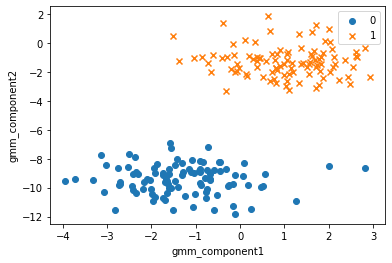

In [7]:
# 가우시안 혼합 모형을 이용한 데이터 플랏
df = X_gmm_df
markers=['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

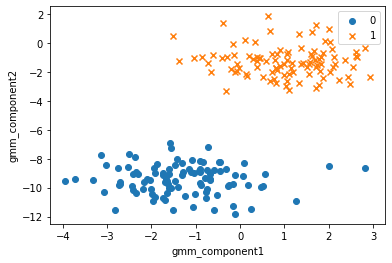

In [8]:
# 실제 타겟 플랏
df = X_gmm_df
markers=['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

In [9]:
# 모형 평가
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, label_gmm)
print(sil_score)

0.7842908753561848


# 통합 코드

(200, 2)
(200,)


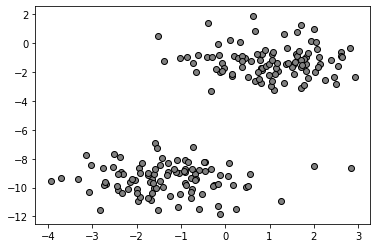

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]
{0, 1}
{0, 1}


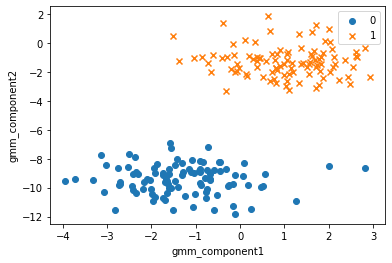

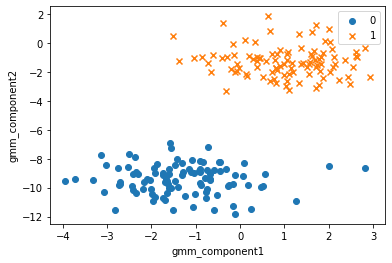

0.7842908753561848


In [10]:
from sklearn.datasets import make_blobs

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 데이터 생성
X,y = make_blobs(n_samples=200, 
                 n_features=2, 
                 centers=2, 
                 random_state=2)

# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

# 라벨링 되지 않은 데이터 플랏
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

# 가우시안 혼합 모형
gmm = GaussianMixture(n_components=2, 
                      random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)
print(label_gmm)

# 시각화를 위한 데이터프레임 생성
gmm_columns = ['gmm_comp1', 'gmm_comp2']
X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm
X_gmm_df.head(5)

# 타겟 클래스 종류 확인
print(set(X_gmm_df['target']))
print(set(X_gmm_df['label_gmm']))

# 가우시안 혼합 모형을 이용한 데이터 플랏
df = X_gmm_df
markers=['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

# 실제 타겟 플랏
df = X_gmm_df
markers=['o','x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

# 모형 평가
sil_score = silhouette_score(X, label_gmm)
print(sil_score)